In [1]:
import pandas as pd
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

## Ingest data

Read csv data from a [Combined Cycle Power Plant](https://storage.googleapis.com/aipi_datasets/CCPP_data.csv)

In [2]:
data = pd.read_csv('data/CCPP_data.csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


- **Features**:
    - Temperature (**T**) in the range 1.81°C to 37.11°C,
    - Ambient Pressure (**AP**) in the range 992.89-1033.30 milibar,
    - Relative Humidity (**RH**) in the range 25.56% to 100.16%
    - Exhaust Vacuum (**V**) in the range 25.36-81.56 cm Hg

- **Target**
    - Net hourly electrical energy output (**PE**) 420.26-495.76 MW

## Machine Learning Approach

This is a *supervised machine learning* problem, where the goal is to predict the **PE** variable. All variables in the dataset are numerical, so we can use a *regression model* to predict the **PE**.

### Algorithms

We'll use the following algorithms:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regression

## Outcome & Output metrics

- **Outcome:** USD per MWh of electricity generated by the plant
- **Output:** RMSE, MAPE, R2



## Feature Engineering

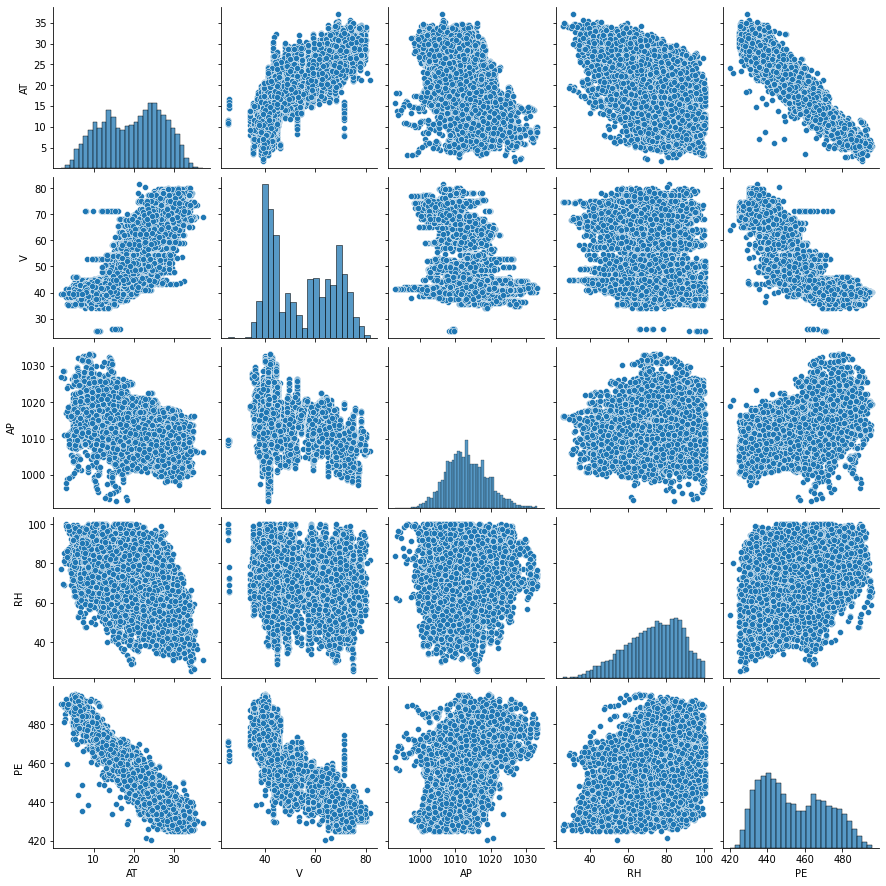

In [3]:
sns.pairplot(data)

Apparently, all features are lineary related to the target.  So we can use a *linear model* to predict it.

## Split data into train and test

Split data in 85% train and 15% test.

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train the model

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('\t\tLinear Regression')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)*100:.2f} %')
print(f'RMSE: {mean_squared_error(y_test, y_pred)**0.5: .2f}')
print(f'R2: {r2_score(y_test, y_pred): .4f}')
cv = 10
print(f'Cross Validation K-folds = {cv} scores:')
for s in cross_val_score(lr, X_train, y_train, cv=cv):
    print(f'\t{s:.4f}')

		Linear Regression
MAPE: 0.79 %
RMSE:  4.45
R2:  0.9324
Cross Validation K-folds = 10 scores:
	0.9254
	0.9366
	0.9273
	0.9256
	0.9328
	0.9183
	0.9306
	0.9287
	0.9201
	0.9260


In [6]:
ride_reg = Ridge()
ride_reg.fit(X_train, y_train)
y_pred = ride_reg.predict(X_test)
print('\t\tRidge Regression')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)*100:.2f} %')
print(f'RMSE: {mean_squared_error(y_test, y_pred)**0.5: .2f}')
print(f'R2: {r2_score(y_test, y_pred): .4f}')
cv = 10
print(f'Cross Validation K-folds = {cv} scores:')
for s in cross_val_score(ride_reg, X_train, y_train, cv=cv):
    print(f'\t{s:.4f}')


		Ridge Regression
MAPE: 0.79 %
RMSE:  4.45
R2:  0.9324
Cross Validation K-folds = 10 scores:
	0.9254
	0.9366
	0.9273
	0.9256
	0.9328
	0.9183
	0.9306
	0.9287
	0.9201
	0.9260


In [7]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print('\t\tLasso Regression')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)*100:.2f} %')
print(f'RMSE: {mean_squared_error(y_test, y_pred)**0.5: .2f}')
print(f'R2: {r2_score(y_test, y_pred): .4f}')
cv = 10
print(f'Cross Validation K-folds = {cv} scores:')
for s in cross_val_score(lasso_reg, X_train, y_train, cv=cv):
    print(f'\t{s:.4f}')

		Lasso Regression
MAPE: 0.79 %
RMSE:  4.46
R2:  0.9321
Cross Validation K-folds = 10 scores:
	0.9252
	0.9360
	0.9270
	0.9252
	0.9323
	0.9179
	0.9310
	0.9285
	0.9202
	0.9260


#### Random Forest with 100 estimators

In [8]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('\t\tRandom Forest Regression')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)*100:.2f} %')
print(f'RMSE: {mean_squared_error(y_test, y_pred)**0.5: .2f}')
print(f'R2: {r2_score(y_test, y_pred): .4f}')
cv = 10
print(f'Cross Validation K-folds = {cv} scores:')
for s in cross_val_score(rf, X_train, y_train, cv=cv):
    print(f'\t{s:.4f}')

		Random Forest Regression
MAPE: 0.52 %
RMSE:  3.23
R2:  0.9645
Cross Validation K-folds = 10 scores:
	0.9559
	0.9659
	0.9594
	0.9579
	0.9619
	0.9455
	0.9568
	0.9669
	0.9511
	0.9594


#### Random Forest with 300 estimators

In [9]:
rf2 = RandomForestRegressor(n_estimators=300, random_state=0)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)
print('\t\tRandom Forest Regression')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)*100:.2f} %')
print(f'RMSE: {mean_squared_error(y_test, y_pred)**0.5: .2f}')
print(f'R2: {r2_score(y_test, y_pred): .4f}')
cv = 10
print(f'Cross Validation K-folds = {cv} scores:')
for s in cross_val_score(rf2, X_train, y_train, cv=cv):
    print(f'\t{s:.4f}')

		Random Forest Regression
MAPE: 0.52 %
RMSE:  3.22
R2:  0.9646
Cross Validation K-folds = 10 scores:
	0.9569
	0.9668
	0.9600
	0.9579
	0.9624
	0.9466
	0.9573
	0.9672
	0.9513
	0.9597


## Model Selection

Random Forest with 100 estimators looks better than the other models, with a RMSE 3.23 and MAPE 0.53%. We use this model to predict the **PE**.

## Visualize the model

In [10]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
index_train = [i for i in range(0, len(y_train))]
index_test = [i for i in range(len(y_train), len(y_train) + len(y_test))]

In [12]:
data_model = pd.concat([pd.DataFrame({'y_hat': y_pred_train, 'type': ['train']*y_pred_train.shape[0], 'x':index_train}), pd.DataFrame({'y_hat': y_pred_test, 'type': ['test']*y_pred_test.shape[0], 'x':index_test}), pd.DataFrame({'y_hat': y_train, 'type': ['real_train']*y_train.shape[0], 'x':index_train}), pd.DataFrame({'y_hat': y_test, 'type': ['real_test']*y_test.shape[0], 'x':index_test})], axis=0)
data_model = pd.pivot_table(data_model, index='x', columns='type', values='y_hat')

<AxesSubplot:xlabel='x'>

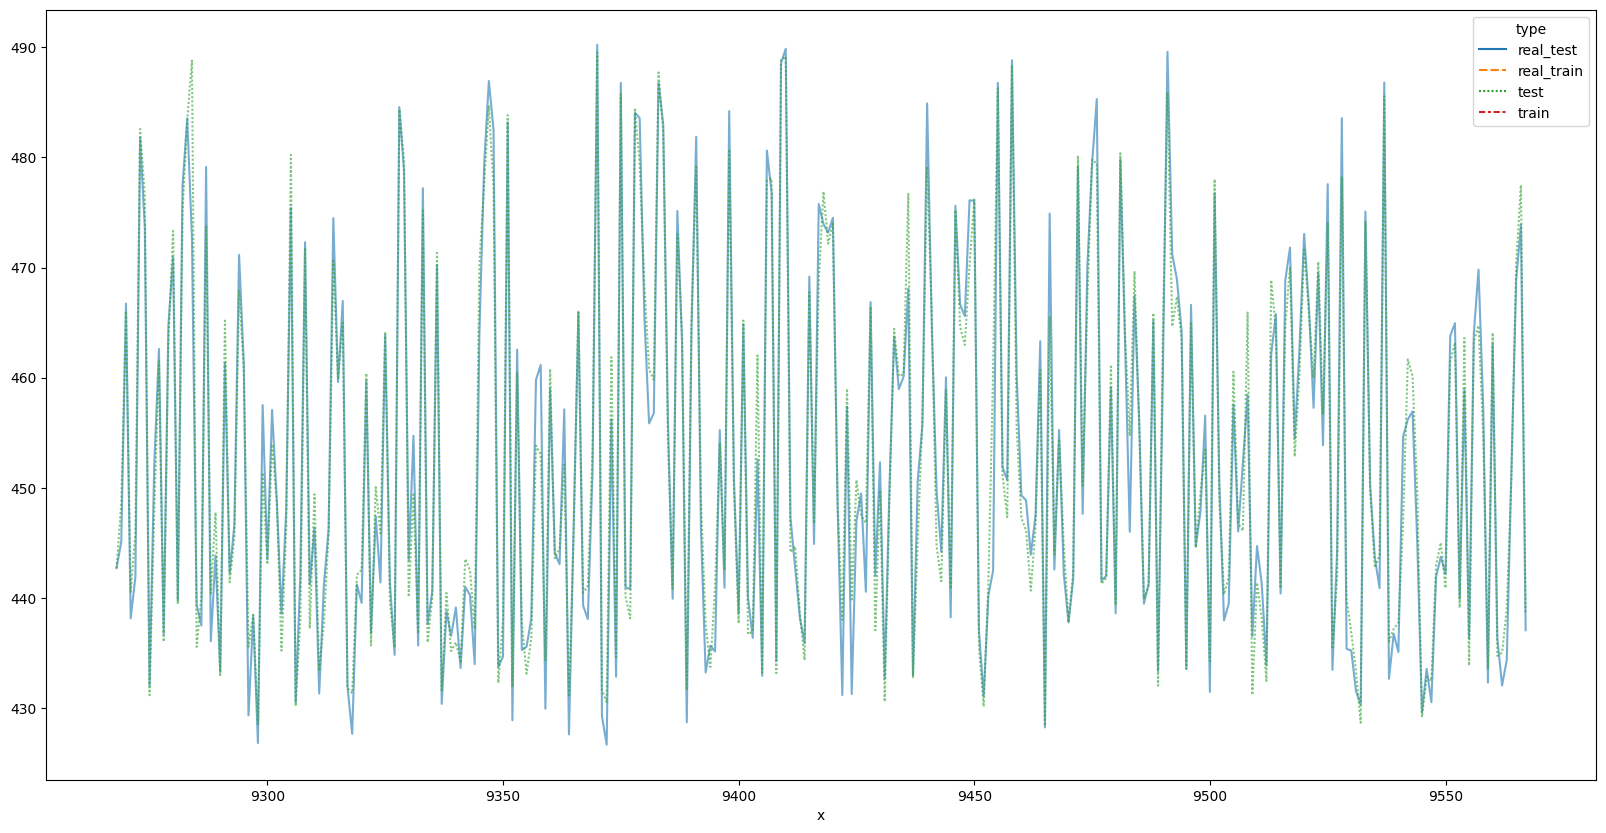

In [25]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data_model.iloc[-300:, :], alpha=0.6)

<AxesSubplot:xlabel='x'>

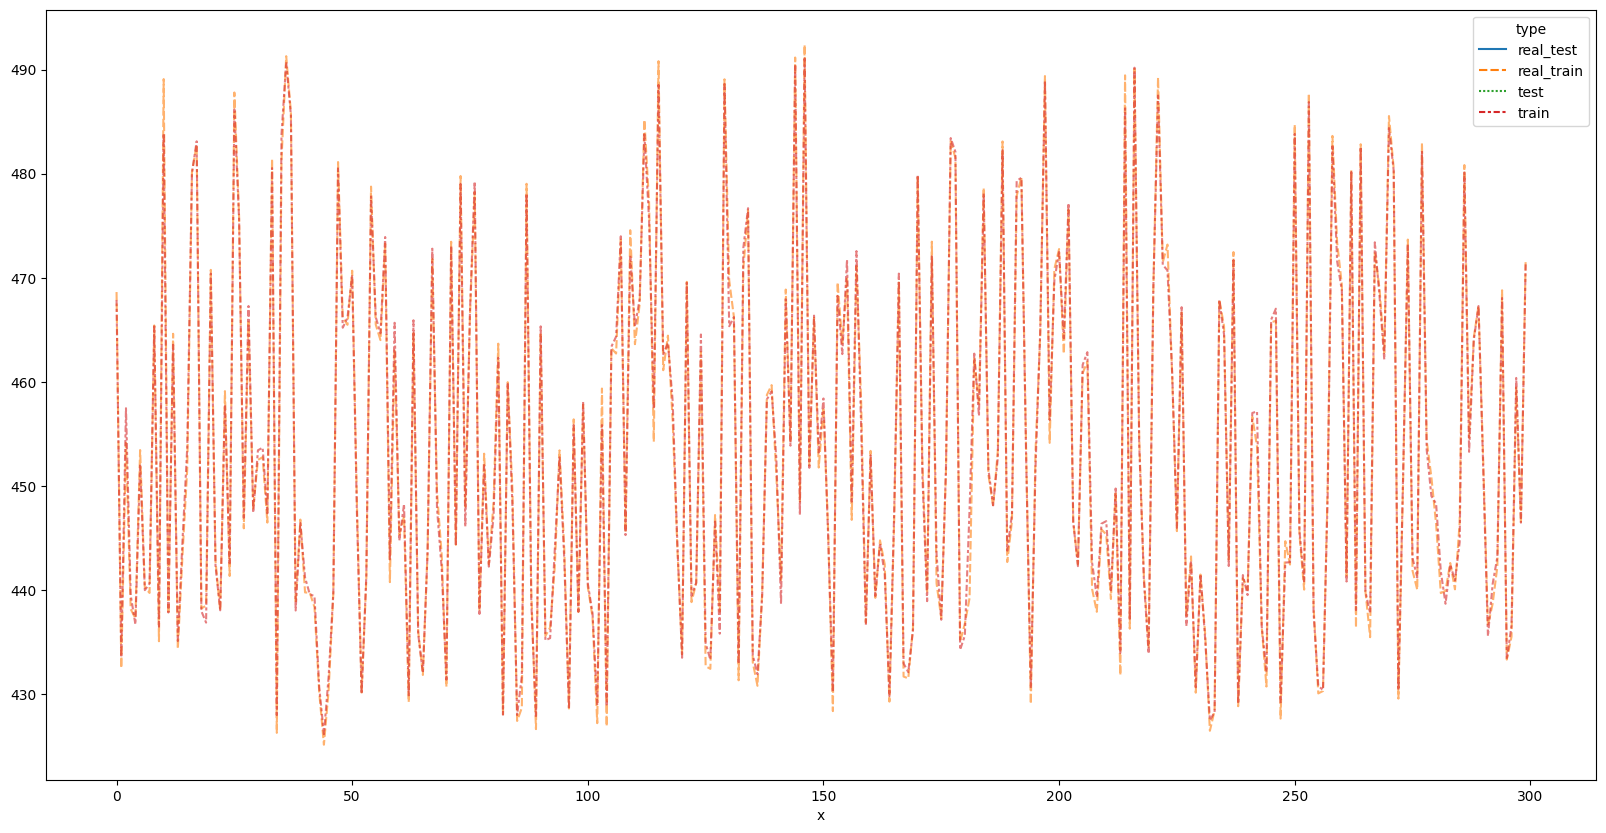

In [29]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data_model.iloc[:300, :], alpha=0.6)